In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
from sklearn.externals import joblib

In [2]:
data_combined = pd.read_csv('./data_combined.csv', header=0, index_col=0)

C:\Users\Barnett\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data_combined.sort_values(["bookingID","second"], inplace=True)

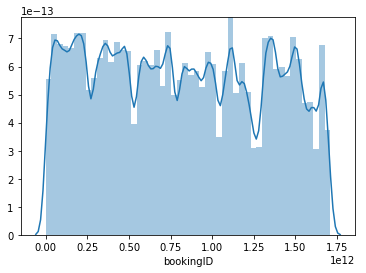

In [6]:
sns.distplot(data_combined["bookingID"])

In [7]:
data_combined["bookingID"].describe()

count    1.278318e+07
mean     8.176912e+11
std      4.951119e+11
min      0.000000e+00
25%      3.779571e+11
50%      7.988639e+11
75%      1.254130e+12
max      1.709397e+12
Name: bookingID, dtype: float64

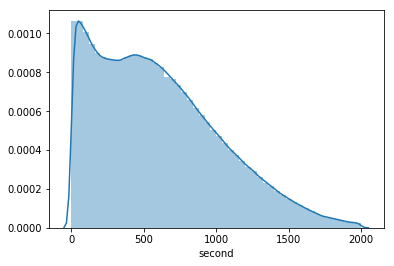

In [28]:
duration = data_combined["second"]
duration = duration.loc[(duration<2000) & (duration>1)]
sns.distplot(duration)

In [29]:
duration.mode()

0    44.0
dtype: float64

In [30]:
duration.describe()

count    1.265020e+07
mean     6.075076e+02
std      4.235120e+02
min      2.000000e+00
25%      2.600000e+02
50%      5.460000e+02
75%      8.800000e+02
max      1.999000e+03
Name: second, dtype: float64

In [18]:
data_combined.iloc[10000]


bookingID          27.000000
accuracy           10.000000
bearing            74.000000
acceleration_x      0.409408
acceleration_y      9.047090
acceleration_z      1.233014
gyro_x              0.156328
gyro_y             -0.002131
gyro_z              0.029295
second            618.000000
speed              16.250000
label               0.000000
Name: 4538310, dtype: float64

In [5]:
unique_bookingIDs = data_combined["bookingID"].unique()

In [21]:
unique_bookingIDs.shape

(19951,)

getting the durations of all the trips

In [36]:
trip_durations = data_combined.groupby("bookingID").max()["second"]

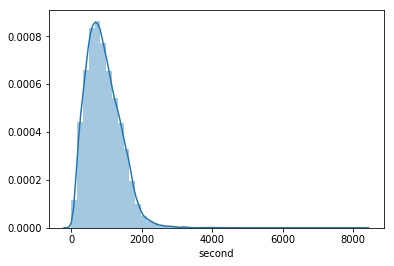

In [39]:
sns.distplot(trip_durations)

In [40]:
trip_durations.describe()

count    19951.000000
mean       908.857751
std        479.983345
min          0.000000
25%        554.000000
50%        840.000000
75%       1211.000000
max       8224.000000
Name: second, dtype: float64

checking the distribution of non-dangerous and dangerous

C:\Users\Barnett\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Barnett\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Barnett\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


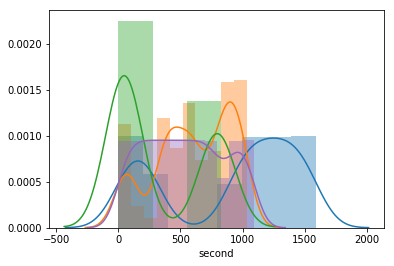

In [49]:
for i in range(5):
    sns.distplot(data_combined.loc[data_combined.bookingID == i]["second"])

2d path of the vehicle

In [59]:
data = data_combined[0:100000]

In [61]:
unique_bookingIDs

array([            0,             1,             2, ..., 1709396983966,
       1709396983971, 1709396983975], dtype=int64)

In [73]:
plt.figure(figsize=(15,10))
for i in range(0,10):
    singleRide = data_combined[data_combined.bookingID == unique_bookingIDs[i]]
    speed = singleRide["speed"].values
    bearing = singleRide["bearing"].values
    time = singleRide["second"].values
    map_x = [0]
    map_y = [0]
    for i in range(len(speed)):
        deltaTime = time[i] - (time[i-1] if i>0 else 0)
        prevSpeed = (speed[i-1] if i>0 else 0)
        distance = 0.5 * (speed[i]+prevSpeed) * deltaTime
        bearing_rad = bearing[i]*2*math.pi/360
        displacementX = math.sin(bearing_rad)*distance
        displacementY = math.cos(bearing_rad)*distance
        new_x = map_x[i] + displacementX
        new_y = map_y[i] + displacementY
        map_x.append(new_x)
        map_y.append(new_y)
    if(singleRide.iloc[0]["label"]==0):
        color = "viridis"
    else:
        color = "r"
    plt.plot(map_x, map_y,color=color)

plt.show()

Traceback (most recent call last):
  File "C:\Users\Barnett\Anaconda3\lib\site-packages\matplotlib\colors.py", line 174, in to_rgba
    rgba = _colors_full_map.cache[c, alpha]
KeyError: ('viridis', None)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Barnett\Anaconda3\lib\site-packages\matplotlib\backends\backend_qt5.py", line 519, in _draw_idle
    self.draw()
  File "C:\Users\Barnett\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 402, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\Barnett\Anaconda3\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "C:\Users\Barnett\Anaconda3\lib\site-packages\matplotlib\figure.py", line 1649, in draw
    renderer, self, artists, self.suppressComposite)
  File "C:\Users\Barnett\Anaconda3\lib\site-packages\matplotlib\image.py", line 138, in _draw_list_compositing_images

In [21]:
%matplotlib inline

In [7]:
import matplotlib.colors as colors

In [8]:
from matplotlib import cm

In [83]:
colormap = cm.get_cmap('viridis', 256)

In [87]:
color = iter(colormap)

TypeError: 'ListedColormap' object is not iterable

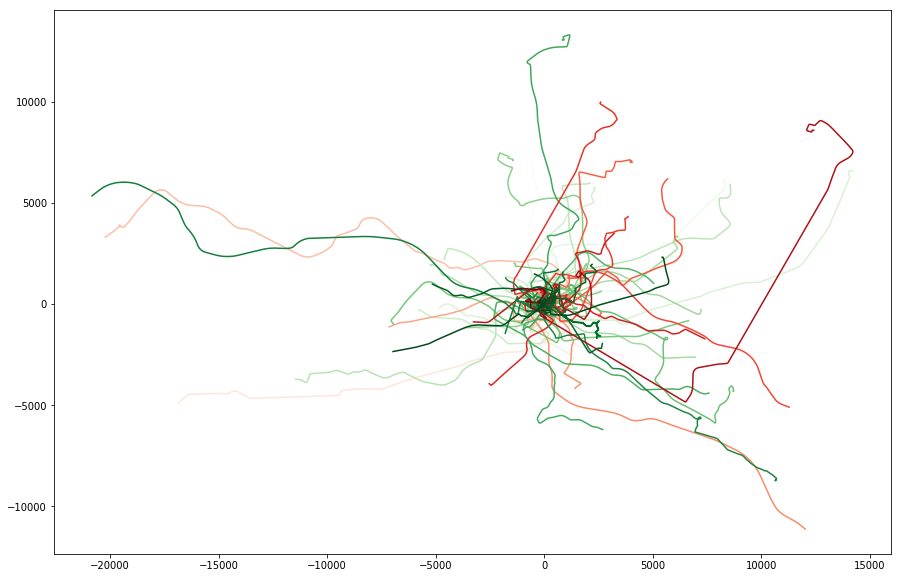

In [22]:
plt.figure(figsize=(15,10))
n = 100

for i in range(0,n):
    singleRide = data_combined[data_combined.bookingID == unique_bookingIDs[i]]
    speed = singleRide["speed"].values
    bearing = singleRide["bearing"].values
    time = singleRide["second"].values
    map_x = [0]
    map_y = [0]
    for j in range(len(speed)):
        deltaTime = time[j] - (time[j-1] if j>0 else 0)
        prevSpeed = (speed[j-1] if j>0 else 0)
        distance = 0.5 * (speed[j]+prevSpeed) * deltaTime
        bearing_rad = bearing[j]*2*math.pi/360
        displacementX = math.sin(bearing_rad)*distance
        displacementY = math.cos(bearing_rad)*distance
        new_x = map_x[j] + displacementX
        new_y = map_y[j] + displacementY
        map_x.append(new_x)
        map_y.append(new_y)
    if(singleRide["label"].iloc[0] == 0):
        color = cm.Greens(i/n)
    else:
        color = cm.Reds(i/n)
    plt.plot(map_x, map_y,color=color)

plt.show()

In [18]:
type(cm.rainbow(np.linspace(0,1,10)))

numpy.ndarray